# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv('paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
#data.step.value_counts()


In [9]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

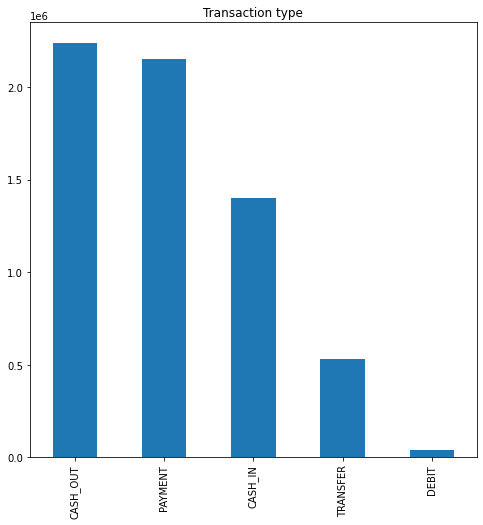

In [10]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

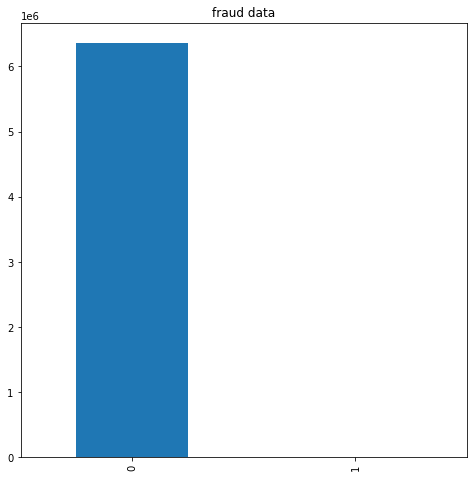

In [11]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [12]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

/Users/anak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

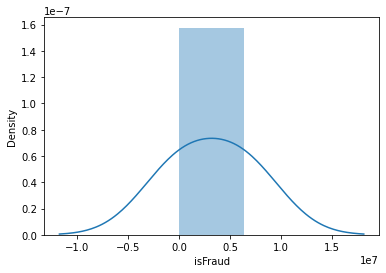

In [13]:
sns.distplot(data.isFraud.value_counts())


In [14]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

In [15]:
# Your response here
#the distribution is right skewed

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [16]:
# Your code here
data.shape

(6362620, 11)

In [17]:
data.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [18]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [19]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [20]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
data.drop(['nameOrig'],axis=1,inplace=True)
data.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
              ... 
M1686642023      1
M1132466969      1
M1106669123      1
M762709246       1
M1923066611      1
Name: nameDest, Length: 2722362, dtype: int64

In [22]:
#SAMPLING otherwise my pc shut down 

In [23]:
data_to_enc = data.sample(frac =.001)

data_enc= pd.get_dummies(data_to_enc, drop_first = True)
data_enc

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,...,nameDest_M990896456,nameDest_M992118146,nameDest_M992357048,nameDest_M993463342,nameDest_M994222886,nameDest_M995973065,nameDest_M996915681,nameDest_M996963153,nameDest_M997376845,nameDest_M998234827
694623,36,13763.64,46861.00,33097.36,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2879728,228,269528.20,0.00,0.00,887171.07,1156699.27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
298817,15,12067.98,4106.00,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5172700,358,50092.40,11226.00,0.00,149953.83,200046.23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2067841,181,399785.99,0.00,0.00,821070.48,1220856.47,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557660,260,6326.50,7295.03,968.52,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4428295,322,169356.11,0.00,0.00,339612.11,508968.22,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3244036,250,245381.76,20350.00,0.00,0.00,245381.76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1474723,141,15891.05,12045.51,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [24]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

x = data_enc.drop(['isFraud'],axis=1)
y = data_enc['isFraud']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=5)

In [26]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

/Users/anak/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
#scoring the model
score = model.score(X_train, y_train)
print(score)

1.0


In [29]:
score = model.score(X_test, y_test)
print(score)

1.0


### Now pick a model of your choice and evaluate its accuracy.

In [30]:
# Your code here
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=5)
clf_model = clf.fit(X_train,y_train)
y_pred = clf_model.predict(X_test)

In [31]:
score = clf_model.score(X_train,y_train)
print(score)

1.0


In [32]:
score = clf_model.score(X_test, y_test)
print(score)


0.9992144540455616


### Which model worked better and how do you know?

# Your response here
the accuracy of both is high bu I consider they are not accurate because the sample is small n order to make it run 

### Let's use NearMiss method for undersampling and compare the results with previous

In [34]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.svm import LinearSVC
undersample = NearMiss(version=1, n_neighbors=3,n_jobs=-1)
# transform the dataset
X_nm, y_nm = undersample.fit_resample(x, y)

### And now let's apply SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X_nm, y_nm)

In [36]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=5) 

### Apply your model on improved data

In [37]:
clf_mod = clf.fit(X_train_sm,y_train_sm)
y_pred = clf_mod.predict(X_test_sm)

score = clf_mod.score(X_train_sm,y_train_sm)
print(score)

score = clf_mod.score(X_test_sm, y_test_sm)
print(score)

1.0
0.3333333333333333


### Calculate classification report for imbalanced data to evaluate the models

In [38]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, clf_mod.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.71      1.00      0.83      0.84      0.69      1272
          1       0.00      1.00      0.71      0.01      0.84      0.73         1

avg / total       1.00      0.71      1.00      0.83      0.84      0.69      1273



### What is your conclusion?